In [3]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
from utide._ut_constants import ut_constants as utide
import os
from utils import *
import pandas as pd
import cartopy.feature as cfeature
import xesmf as xe
from scipy.ndimage import gaussian_filter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from palette import *
import statsmodels.api as sm


# useful variables
j=np.complex(0,1)
cpd=2.*np.pi/86400. # from cpd to radian/s
crs = ccrs.PlateCarree() # cartopy


#datadir = './'
datadir = '/home7/pharos/othr/cgonzale/data/iwsst_mit/1month/'
datadir_out = '/home7/pharos/othr/cgonzale/data/iwsst_mit/working/'
graphdir = '/home3/homedir7/perso/cgonzale/IWAVE/figures/Simul_MITgcm/'
bathy = '/home2/pharos/othr/aponte/bathy/ETOPO2v2c_f4.nc'
datadir_tides = '/home2/pharos/othr/aponte/tides/HRET/'
datadir_tides2 = '/home2/pharos/othr/aponte/tides/FES2014/'
# tmp
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

palette = '/home3/homedir7/perso/cgonzale/IWAVE/script/palette/medspiration.rgb'
csst = getColorMap( rgbFile = palette )

/home/lervily/cgonzale/miniconda3/envs/iwsst/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
matplotlib.rcParams.update({'font.size': 14})

In [5]:
Region = 'AustraliaHW'
if (Region == 'AustraliaHW'):
    latmin_z = -22 #-14,-13
    latmax_z = -13#-12, -7
    lonmin_z =  114#52,49
    lonmax_z =  124#55,53
    vmin = 22
    vmax = 29
    vmax_grad = 0.1
    vmax_tw=0.05
    it=1
    fregion = 'nwa_'

img_extent = (lonmin_z, lonmax_z, latmin_z, latmax_z)

### Semidiurnal 

In [12]:
file = 'fast_U_semidiurnal.nc'
Ufast_semi = xr.open_dataset(datadir_out+file,chunks={'j':100})
file = 'slow_U_semidiurnal.nc'
Uslow_semi = xr.open_dataset(datadir_out+file,chunks={'j':100})

In [14]:
print(Uslow_semi)

<xarray.Dataset>
Dimensions:      (i: 480, j: 492, time: 49)
Coordinates:
    face         int64 ...
  * i            (i) int64 2976 2977 2978 2979 2980 2981 2982 2983 2984 2985 ...
  * j            (j) int64 2427 2428 2429 2430 2431 2432 2433 2434 2435 2436 ...
    XC           (j, i) float32 dask.array<shape=(492, 480), chunksize=(100, 480)>
    YC           (j, i) float32 dask.array<shape=(492, 480), chunksize=(100, 480)>
    rA           (j, i) float32 dask.array<shape=(492, 480), chunksize=(100, 480)>
    Depth        (j, i) float32 dask.array<shape=(492, 480), chunksize=(100, 480)>
  * time         (time) float64 1.372e+07 1.372e+07 1.372e+07 1.373e+07 ...
    iters        (time) int64 dask.array<shape=(49,), chunksize=(49,)>
Data variables:
    U_slow_semi  (j, i, time) float64 dask.array<shape=(492, 480, 49), chunksize=(100, 480, 49)>


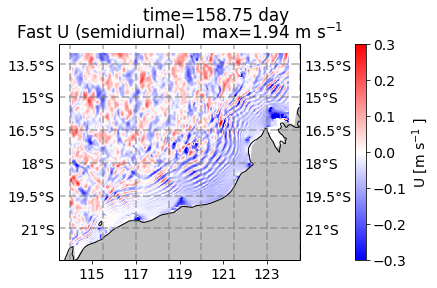

In [17]:
fig = plt.figure()
#plot wave SST
t0=0

pad = 0.15
ax = make_cartopy(1,1,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=1, lonticks = [115,117,119,121,123])
#cs = ax.imshow(toplt, origin='lower', extent=img_extent, transform=ccrs.PlateCarree(),vmax=vmax_tw)
cs = ax.pcolormesh(Ufast_semi.XC,Ufast_semi.YC,Ufast_semi.U_fast_semi[:,:,t0], \
                transform = ccrs.PlateCarree(),cmap='bwr',vmax=0.3,vmin=-0.3)
cbar = fig.colorbar(cs, ax=ax, pad=pad)
#cbar.set_label(cst+  r'  $T_w[^\circ$C]')
cbar.set_label(r'U [m s$^{-1}$ ]')
ax.set_title(r'Fast U (semidiurnal)   max=%.2f m s$^{-1}$' %(np.abs(Ufast_semi.U_fast_semi).max(skipna=True) ))
thour=(Ufast_semi.time[t0]/3600)
tday=(Ufast_semi.time[t0]/(3600*24.))
title=str(tday.values)
fig.suptitle('time=%.2f day'%(tday.values))
plt.subplots_adjust(left=0.1,right=0.95,hspace=0.5,wspace=0.3,top=0.85,bottom=0.1)
figname='U_fast_semidiurnal_'+str(int(thour.values))+'.png'
frame = graphdir+'movies/Semidiurnal_U/Fast/'+figname
fig.savefig(frame, dpi=150)

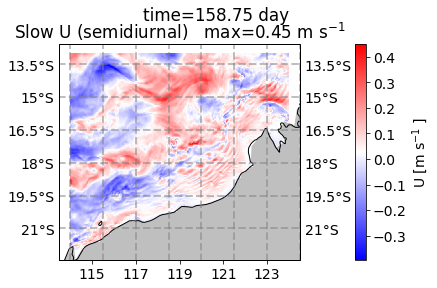

In [20]:
fig = plt.figure()
#plot wave SST
t0=0

pad = 0.15
ax = make_cartopy(1,1,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=1, lonticks = [115,117,119,121,123])
#cs = ax.imshow(toplt, origin='lower', extent=img_extent, transform=ccrs.PlateCarree(),vmax=vmax_tw)
cs = ax.pcolormesh(Uslow_semi.XC,Uslow_semi.YC,Uslow_semi.U_slow_semi[:,:,t0], \
                transform = ccrs.PlateCarree(),cmap='bwr',vmin = -0.4, vmax = 0.4)
cbar = fig.colorbar(cs, ax=ax, pad=pad)
#cbar.set_label(cst+  r'  $T_w[^\circ$C]')
cbar.set_label(r'U [m s$^{-1}$ ]')
ax.set_title(r'Slow U (semidiurnal)   max=%.2f m s$^{-1}$' %(np.abs(Uslow_semi.U_slow_semi).max(skipna=True) ))
thour=(Uslow_semi.time[t0]/3600)
tday=(Uslow_semi.time[t0]/(3600*24.))
title=str(tday.values)
fig.suptitle('time=%.2f day'%(tday.values))
plt.subplots_adjust(left=0.1,right=0.95,hspace=0.5,wspace=0.3,top=0.85,bottom=0.1)
figname='U_slow_semidiurnal_'+str(int(thour.values))+'.png'
frame = graphdir+'movies/Semidiurnal_U/Slow/'+figname
fig.savefig(frame, dpi=150)

In [29]:
Nt=Ufast_semi.time.size
for t0 in range(Nt):
    fig = plt.figure()
    #plot wave SST


    pad = 0.15
    ax = make_cartopy(1,1,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=1, lonticks = [115,117,119,121,123])
    #cs = ax.imshow(toplt, origin='lower', extent=img_extent, transform=ccrs.PlateCarree(),vmax=vmax_tw)
    cs = ax.pcolormesh(Ufast_semi.XC,Ufast_semi.YC,Ufast_semi.U_fast_semi[:,:,t0], \
                    transform = ccrs.PlateCarree(),cmap='bwr',vmax=0.3,vmin=-0.3)
    cbar = fig.colorbar(cs, ax=ax, pad=pad)
    #cbar.set_label(cst+  r'  $T_w[^\circ$C]')
    cbar.set_label(r'U [m s$^{-1}$ ]')
    ax.set_title(r'Fast U (semidiurnal)   max=%.2f m s$^{-1}$' %(np.abs(Ufast_semi.U_fast_semi[:,:,t0]).max(skipna=True) ))
    thour=(Ufast_semi.time[t0]/3600)
    tday=(Ufast_semi.time[t0]/(3600*24.))
    title=str(tday.values)
    fig.suptitle('time=%.2f day'%(tday.values))
    plt.subplots_adjust(left=0.1,right=0.95,hspace=0.5,wspace=0.3,top=0.85,bottom=0.1)
    figname='U_fast_semidiurnal_'+str(int(thour.values))+'.png'
    frame = graphdir+'movies/Semidiurnal_U/Fast/'+figname
    fig.savefig(frame, dpi=150)

    plt.close(fig)
 

frame: 0
frame: 1
frame: 2
frame: 3
frame: 4
frame: 5
frame: 6
frame: 7
frame: 8
frame: 9
frame: 10
frame: 11
frame: 12
frame: 13
frame: 14
frame: 15
frame: 16
frame: 17
frame: 18
frame: 19
frame: 20
frame: 21
frame: 22
frame: 23
frame: 24
frame: 25
frame: 26
frame: 27
frame: 28
frame: 29
frame: 30
frame: 31
frame: 32
frame: 33
frame: 34
frame: 35
frame: 36
frame: 37
frame: 38
frame: 39
frame: 40
frame: 41
frame: 42
frame: 43
frame: 44
frame: 45
frame: 46
frame: 47
frame: 48


In [21]:
Nt=Ufast_semi.time.size
for t0 in range(Nt):
    fig = plt.figure()

    pad = 0.15
    ax = make_cartopy(1,1,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=1, lonticks = [115,117,119,121,123])
    #cs = ax.imshow(toplt, origin='lower', extent=img_extent, transform=ccrs.PlateCarree(),vmax=vmax_tw)
    cs = ax.pcolormesh(Uslow_semi.XC,Uslow_semi.YC,Uslow_semi.U_slow_semi[:,:,t0], \
                    transform = ccrs.PlateCarree(),cmap='bwr',vmin = -0.4, vmax = 0.4)
    cbar = fig.colorbar(cs, ax=ax, pad=pad)
    #cbar.set_label(cst+  r'  $T_w[^\circ$C]')
    cbar.set_label(r'U [m s$^{-1}$ ]')
    ax.set_title(r'Slow U (semidiurnal)   max=%.2f m s$^{-1}$' %(np.abs(Uslow_semi.U_slow_semi).max(skipna=True) ))
    thour=(Uslow_semi.time[t0]/3600)
    tday=(Uslow_semi.time[t0]/(3600*24.))
    title=str(tday.values)
    fig.suptitle('time=%.2f day'%(tday.values))
    plt.subplots_adjust(left=0.1,right=0.95,hspace=0.5,wspace=0.3,top=0.85,bottom=0.1)
    figname='U_slow_semidiurnal_'+str(int(thour.values))+'.png'
    frame = graphdir+'movies/Semidiurnal_U/Slow/'+figname
    fig.savefig(frame, dpi=150)

    plt.close(fig)

In [22]:
file = 'fast_V_semidiurnal.nc'
Vfast_semi = xr.open_dataset(datadir_out+file,chunks={'j':100})
file = 'slow_V_semidiurnal.nc'
Vslow_semi = xr.open_dataset(datadir_out+file,chunks={'j':100})

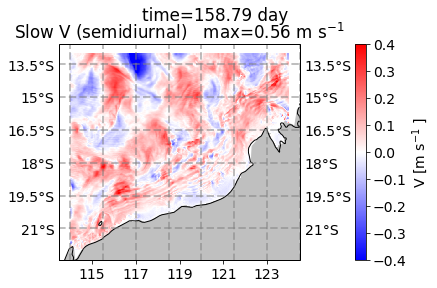

In [38]:
fig = plt.figure()
t0=1
pad = 0.15
ax = make_cartopy(1,1,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=1, lonticks = [115,117,119,121,123])
#cs = ax.imshow(toplt, origin='lower', extent=img_extent, transform=ccrs.PlateCarree(),vmax=vmax_tw)
cs = ax.pcolormesh(Vslow_semi.XC,Vslow_semi.YC,Vslow_semi.V_slow_semi[:,:,t0], \
                transform = ccrs.PlateCarree(),cmap='bwr',vmin = -0.4, vmax = 0.4)
cbar = fig.colorbar(cs, ax=ax, pad=pad)
#cbar.set_label(cst+  r'  $T_w[^\circ$C]')
cbar.set_label(r'V [m s$^{-1}$ ]')
ax.set_title(r'Slow V (semidiurnal)   max=%.2f m s$^{-1}$' %(np.abs(Vslow_semi.V_slow_semi).max(skipna=True) ))
thour=(Vslow_semi.time[t0]/3600)
tday=(Vslow_semi.time[t0]/(3600*24.))
title=str(tday.values)
fig.suptitle('time=%.2f day'%(tday.values))
plt.subplots_adjust(left=0.1,right=0.95,hspace=0.5,wspace=0.3,top=0.85,bottom=0.1)
figname='V_slow_semidiurnal_'+str(int(thour.values))+'.png'
frame = graphdir+'movies/Semidiurnal_V/Slow/'+figname
#frame = '/home3/homedir7/perso/cgonzale/IWAVE/figures/Simul_MITgcm/movies/Semidiurnal_V/Slow/dum.png'
fig.savefig(frame, dpi=150)

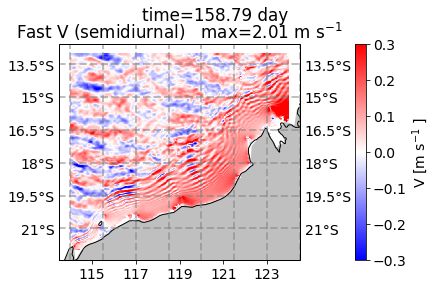

In [37]:
fig = plt.figure()
#plot wave SST
t0=1

pad = 0.15
ax = make_cartopy(1,1,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=1, lonticks = [115,117,119,121,123])
#cs = ax.imshow(toplt, origin='lower', extent=img_extent, transform=ccrs.PlateCarree(),vmax=vmax_tw)
cs = ax.pcolormesh(Vfast_semi.XC,Vfast_semi.YC,Vfast_semi.V_fast_semi[:,:,t0], \
                transform = ccrs.PlateCarree(),cmap='bwr',vmax=0.3,vmin=-0.3)
cbar = fig.colorbar(cs, ax=ax, pad=pad)
#cbar.set_label(cst+  r'  $T_w[^\circ$C]')
cbar.set_label(r'V [m s$^{-1}$ ]')
ax.set_title(r'Fast V (semidiurnal)   max=%.2f m s$^{-1}$' %(np.abs(Vfast_semi.V_fast_semi[:,:,t0]).max(skipna=True) ))
thour=(Vfast_semi.time[t0]/3600)
tday=(Vfast_semi.time[t0]/(3600*24.))
title=str(tday.values)
fig.suptitle('time=%.2f day'%(tday.values))
plt.subplots_adjust(left=0.1,right=0.95,hspace=0.5,wspace=0.3,top=0.85,bottom=0.1)
figname='V_fast_semidiurnal_'+str(int(thour.values))+'.png'
frame = graphdir+'movies/Semidiurnal_V/Fast/'+figname
fig.savefig(frame, dpi=150)

In [28]:
Nt=Vfast_semi.time.size
for t0 in range(Nt):
    fig = plt.figure()


    pad = 0.15
    ax = make_cartopy(1,1,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=1, lonticks = [115,117,119,121,123])
    #cs = ax.imshow(toplt, origin='lower', extent=img_extent, transform=ccrs.PlateCarree(),vmax=vmax_tw)
    cs = ax.pcolormesh(Vfast_semi.XC,Vfast_semi.YC,Vfast_semi.V_fast_semi[:,:,t0], \
                    transform = ccrs.PlateCarree(),cmap='bwr',vmax=0.3,vmin=-0.3)
    cbar = fig.colorbar(cs, ax=ax, pad=pad)
    #cbar.set_label(cst+  r'  $T_w[^\circ$C]')
    cbar.set_label(r'V [m s$^{-1}$ ]')
    ax.set_title(r'Fast V (semidiurnal)   max=%.2f m s$^{-1}$' %(np.abs(Vfast_semi.V_fast_semi).max(skipna=True) ))
    thour=(Vfast_semi.time[t0]/3600)
    tday=(Vfast_semi.time[t0]/(3600*24.))
    title=str(tday.values)
    fig.suptitle('time=%.2f day'%(tday.values))
    plt.subplots_adjust(left=0.1,right=0.95,hspace=0.5,wspace=0.3,top=0.85,bottom=0.1)
    figname='V_fast_semidiurnal_'+str(int(thour.values))+'.png'
    frame = graphdir+'movies/Semidiurnal_V/Fast/'+figname
    fig.savefig(frame, dpi=150)

    plt.close(fig)

In [39]:
Nt=Vfast_semi.time.size
for t0 in range(Nt):
    fig = plt.figure()


    pad = 0.15
    ax = make_cartopy(1,1,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=1, lonticks = [115,117,119,121,123])
    #cs = ax.imshow(toplt, origin='lower', extent=img_extent, transform=ccrs.PlateCarree(),vmax=vmax_tw)
    cs = ax.pcolormesh(Vslow_semi.XC,Vslow_semi.YC,Vslow_semi.V_slow_semi[:,:,t0], \
                    transform = ccrs.PlateCarree(),cmap='bwr',vmax=0.3,vmin=-0.3)
    cbar = fig.colorbar(cs, ax=ax, pad=pad)
    #cbar.set_label(cst+  r'  $T_w[^\circ$C]')
    cbar.set_label(r'V [m s$^{-1}$ ]')
    ax.set_title(r'Slow V (semidiurnal)   max=%.2f m s$^{-1}$' %(np.abs(Vslow_semi.V_slow_semi[:,:,t0]).max(skipna=True) ))
    thour=(Vslow_semi.time[t0]/3600)
    tday=(Vslow_semi.time[t0]/(3600*24.))
    title=str(tday.values)
    fig.suptitle('time=%.2f day'%(tday.values))
    plt.subplots_adjust(left=0.1,right=0.95,hspace=0.5,wspace=0.3,top=0.85,bottom=0.1)
    figname='V_slow_semidiurnal_'+str(int(thour.values))+'.png'
    frame = graphdir+'movies/Semidiurnal_V/Slow/'+figname
    fig.savefig(frame, dpi=150)

    plt.close(fig)

In [41]:
V_mag = np.sqrt(Ufast_semi.U_fast_semi**2+Vfast_semi.V_fast_semi**2)

In [42]:
print(V_mag)

<xarray.DataArray (j: 492, i: 480, time: 49)>
array([[[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan]],

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan]],

       ...,

       [[0.143991, 0.159491, ..., 0.155263, 0.139792],
        [0.152495, 0.165664, ..., 0.154928, 0.14203 ],
        ...,
        [0.031982, 0.160735, ..., 0.270756, 0.208653],
        [0.039429, 0.098781, ..., 0.267958, 0.23899 ]],

       [[0.140526, 0.157261, ..., 0.132683, 0.115611],
        [0.148491, 0.16263 , ..., 0.136892, 0.12307 ],
        ...,
        [0.041559, 0.168372, ..., 0.268248, 0.201937],
        [0.035958, 0.106017, ..., 0.267769, 0.23545 ]]])
C

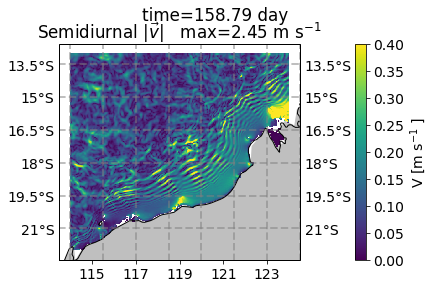

In [45]:
fig = plt.figure()
t0=1
pad = 0.15
ax = make_cartopy(1,1,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=1, lonticks = [115,117,119,121,123])
#cs = ax.imshow(toplt, origin='lower', extent=img_extent, transform=ccrs.PlateCarree(),vmax=vmax_tw)
cs = ax.pcolormesh(V_mag.XC,V_mag.YC,V_mag[:,:,t0], \
                transform = ccrs.PlateCarree(),vmin = 0, vmax = 0.4)
cbar = fig.colorbar(cs, ax=ax, pad=pad)
#cbar.set_label(cst+  r'  $T_w[^\circ$C]')
cbar.set_label(r'V [m s$^{-1}$ ]')
ax.set_title(r'Semidiurnal $|\vec{v}|$   max=%.2f m s$^{-1}$' %(np.abs(V_mag).max(skipna=True) ))
thour=(Vslow_semi.time[t0]/3600)
tday=(Vslow_semi.time[t0]/(3600*24.))
title=str(tday.values)
fig.suptitle('time=%.2f day'%(tday.values))
plt.subplots_adjust(left=0.1,right=0.95,hspace=0.5,wspace=0.3,top=0.85,bottom=0.1)
figname='V_slow_semidiurnal_'+str(int(thour.values))+'.png'
frame = graphdir+'movies/Semidiurnal_V_magnitude/Fast/'+figname
#frame = '/home3/homedir7/perso/cgonzale/IWAVE/figures/Simul_MITgcm/movies/Semidiurnal_V/Slow/dum.png'
fig.savefig(frame, dpi=150)

In [50]:
#read tides
hret, constituents, omega = get_hret_ssh(constituents=['M2'], lonb=(lonmin_z, lonmax_z), latb=(latmin_z, latmax_z), hret=datadir_tides+'/Carrere_HRET_testing.nc',bathy=bathy)
print(hret)

M2 omega=1.405189e-04 rad/s, 1.932 cpd
/home2/pharos/othr/aponte/bathy/ETOPO2v2c_f4.nc
<xarray.Dataset>
Dimensions:    (latitude: 180, longitude: 201)
Coordinates:
  * longitude  (longitude) float64 114.0 114.1 114.1 114.2 114.2 114.2 114.3 ...
  * latitude   (latitude) float64 -22.0 -21.95 -21.9 -21.85 -21.8 -21.75 ...
Data variables:
    M2re       (latitude, longitude) float64 dask.array<shape=(180, 201), chunksize=(120, 201)>
    M2im       (latitude, longitude) float64 dask.array<shape=(180, 201), chunksize=(120, 201)>
    mask       (latitude, longitude) float64 dask.array<shape=(180, 201), chunksize=(120, 201)>
    h          (latitude, longitude) float64 -51.5 -6.001 -9.999 11.0 18.5 ...
Attributes:
    history:                  merged txa/j1a/j2a, txb/j1b, g1a, and e2a/n1b/s...
    resolution:               The spatial basis function coefficients are def...
    creator:                  Ed Zaron, ezaron@pdx.edu
    post-processing scripts:  baburu:NASA-Tides/Julia/; this file 

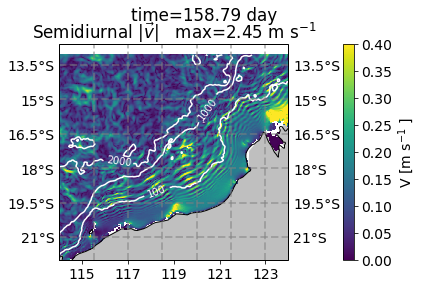

In [52]:
img_extent
fig = plt.figure()
t0=1
pad = 0.15
ax = make_cartopy(1,1,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=1, lonticks = [115,117,119,121,123])
#cs = ax.imshow(toplt, origin='lower', extent=img_extent, transform=ccrs.PlateCarree(),vmax=vmax_tw)
cs = ax.pcolormesh(V_mag.XC,V_mag.YC,V_mag[:,:,t0], \
                transform = ccrs.PlateCarree(),vmin = 0, vmax = 0.4)
cbar = fig.colorbar(cs, ax=ax, pad=pad)
levels=[100,1000,2000]
ccont = ax.contour(hret.longitude,hret.latitude,hret['h'],levels, extent=img_extent, transform=ccrs.PlateCarree(),colors='w')
plt.clabel(ccont, inline=1, fontsize=10,fmt='%.0f')
#cbar.set_label(cst+  r'  $T_w[^\circ$C]')
cbar.set_label(r'V [m s$^{-1}$ ]')
ax.set_title(r'Semidiurnal $|\vec{v}|$   max=%.2f m s$^{-1}$' %(np.abs(V_mag).max(skipna=True) ))
thour=(Vslow_semi.time[t0]/3600)
tday=(Vslow_semi.time[t0]/(3600*24.))
title=str(tday.values)
fig.suptitle('time=%.2f day'%(tday.values))
plt.subplots_adjust(left=0.1,right=0.95,hspace=0.5,wspace=0.3,top=0.85,bottom=0.1)
figname='V_slow_semidiurnal_'+str(int(thour.values))+'.png'
frame = graphdir+'movies/Semidiurnal_V_magnitude/Fast/'+figname
#frame = '/home3/homedir7/perso/cgonzale/IWAVE/figures/Simul_MITgcm/movies/Semidiurnal_V/Slow/dum.png'
fig.savefig(frame, dpi=150)

In [53]:
Nt=V_mag.time.size
for t0 in range(Nt):
    fig = plt.figure()
    pad = 0.15
    ax = make_cartopy(1,1,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=1, lonticks = [115,117,119,121,123])
    #cs = ax.imshow(toplt, origin='lower', extent=img_extent, transform=ccrs.PlateCarree(),vmax=vmax_tw)
    cs = ax.pcolormesh(V_mag.XC,V_mag.YC,V_mag[:,:,t0], \
                    transform = ccrs.PlateCarree(),vmin = 0, vmax = 0.4)
    cbar = fig.colorbar(cs, ax=ax, pad=pad)
    #cbar.set_label(cst+  r'  $T_w[^\circ$C]')
    cbar.set_label(r'V [m s$^{-1}$ ]')
    levels=[100,1000,2000]
    ccont = ax.contour(hret.longitude,hret.latitude,hret['h'],levels, extent=img_extent, transform=ccrs.PlateCarree(),colors='w')
    plt.clabel(ccont, inline=1, fontsize=10,fmt='%.0f')
    ax.set_title(r'Semidiurnal $|\vec{v}|$   max=%.2f m s$^{-1}$' %(np.abs(V_mag[:,:,t0]).max(skipna=True) ))
    thour=(Vslow_semi.time[t0]/3600)
    tday=(Vslow_semi.time[t0]/(3600*24.))
    title=str(tday.values)
    fig.suptitle('time=%.2f day'%(tday.values))
    plt.subplots_adjust(left=0.1,right=0.95,hspace=0.5,wspace=0.3,top=0.85,bottom=0.1)
    figname='V_slow_semidiurnal_'+str(int(thour.values))+'.png'
    frame = graphdir+'movies/Semidiurnal_V_magnitude/Fast/'+figname
    #frame = '/home3/homedir7/perso/cgonzale/IWAVE/figures/Simul_MITgcm/movies/Semidiurnal_V/Slow/dum.png'
    fig.savefig(frame, dpi=150)
    plt.close(fig)

---

### Create velocity components frame movie 

In [1]:
file = fregion+'SSU.nc'
dsU = xr.open_dataset(datadir+file,chunks={'j':100})
file = fregion+'SSV.nc'
dsV = xr.open_dataset(datadir+file,chunks={'j':100})

NameError: name 'fregion' is not defined